# GCC ssc-resolution: Fourier Ring Correlation (FRC) 

- #### Questions? E-mail gcc@lnls.br or open a ticket internally at SSLinhas

## Install packages

In [11]:
install_packages = False

if install_packages:
    import sscInstall, os
    server = sscInstall.connect_server()
    print("\nThe kernel will restart after installation. Please run the cell again using install_packages = False")
    sscInstall.install_jupyter(server,beamline='caterete',sscCdi='0.4.20',sscPtycho='2.1.1',sscPimega='0.5.3',sscRaft='2.0.1',sscRadon='1.0.0',sscResolution='0.5.5'), os._exit(00) # shutdown kernel. Required to import new installed packages

## Load packages

In [1]:
%matplotlib widget
from sscResolution import fsc, frc, load_data_for_FC
import matplotlib.pyplot as plt

## Inputs for filtering

- __padding:__ padding on the original image (not necessary, can be = 0);
- __sharpness:__ sharpness of the sigmoidal window. The higher the value, the sharper the edge;
- __radius:__ radius of the window from the center of the image;

In [18]:
padding = 0
sharpness = 10
radius = 0.99

- __cpus:__ number of cpus for FRC calculation;
- __pixel_size:__ pixel size of the object in nanometers

In [19]:
cpus = 1
pixel_size = 10 # nanometers

# FRC

## Load data

- __path:__ absolute path to a .npy or .tiff file, for instance: /ibira/lnls/beamlines/caterete/proposals/00000000/proc/recons/sample01/sample01.npy
- __start:__ (pixel_row,pixel_column) values to crop the image to squared format. starting positions at the top-left corner
- __size:__ size of the square side
- __use_phantom:__ True if you want to run the algorithm using a test image; False to use your own path

In [20]:
path = "/ibira/lnls/beamlines/caterete/proposals/20230614/proc/recons/alignment20/alignment20_object.npy"

import numpy as np
path = "/ibira/lnls/beamlines/caterete/proposals/20230614/proc/recons/alignment20/alignment20_object2.npy"
dado = np.load(path)[0]
np.save(path2,dado)


In [21]:
img = load_data_for_FC(path=path2,start=(0,0),size=10,use_phantom=True) #

## Apply filtering

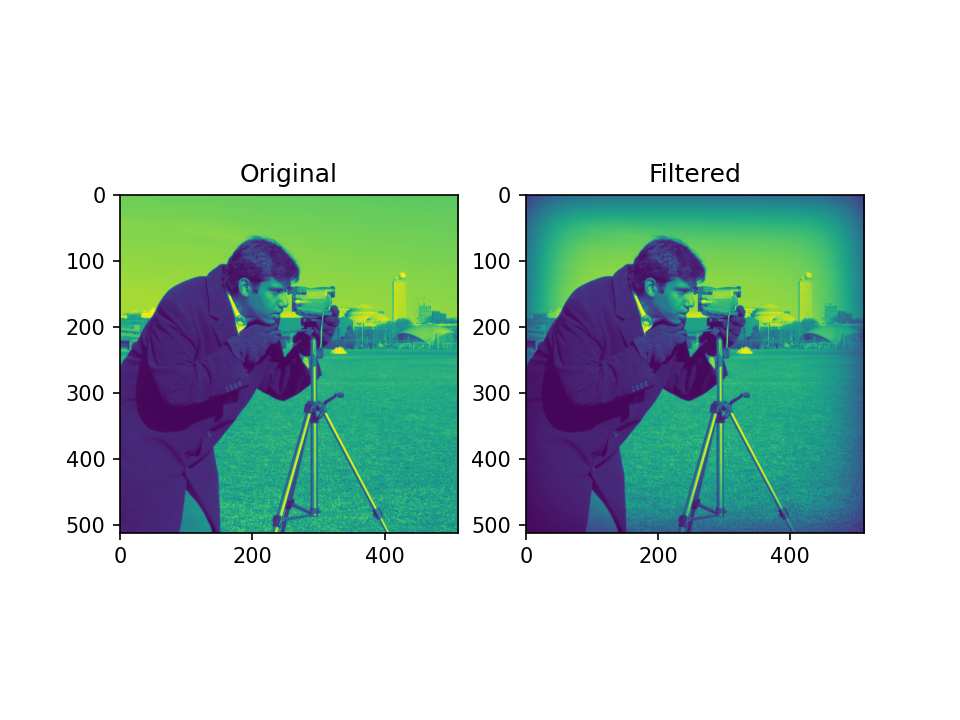

In [22]:
wimg = frc.window( img, padding, [sharpness, radius] )

fig, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(img), ax[0].set_title('Original')
ax[1].imshow(wimg), ax[1].set_title('Filtered') 
plt.show()

## FRC Calculation

ssc-resolution: 2x (256, 256) 2D FFT: 0.00409698486328125 sec
ssc-resolution: parallel processing over 128 rings within 0.15433740615844727 sec


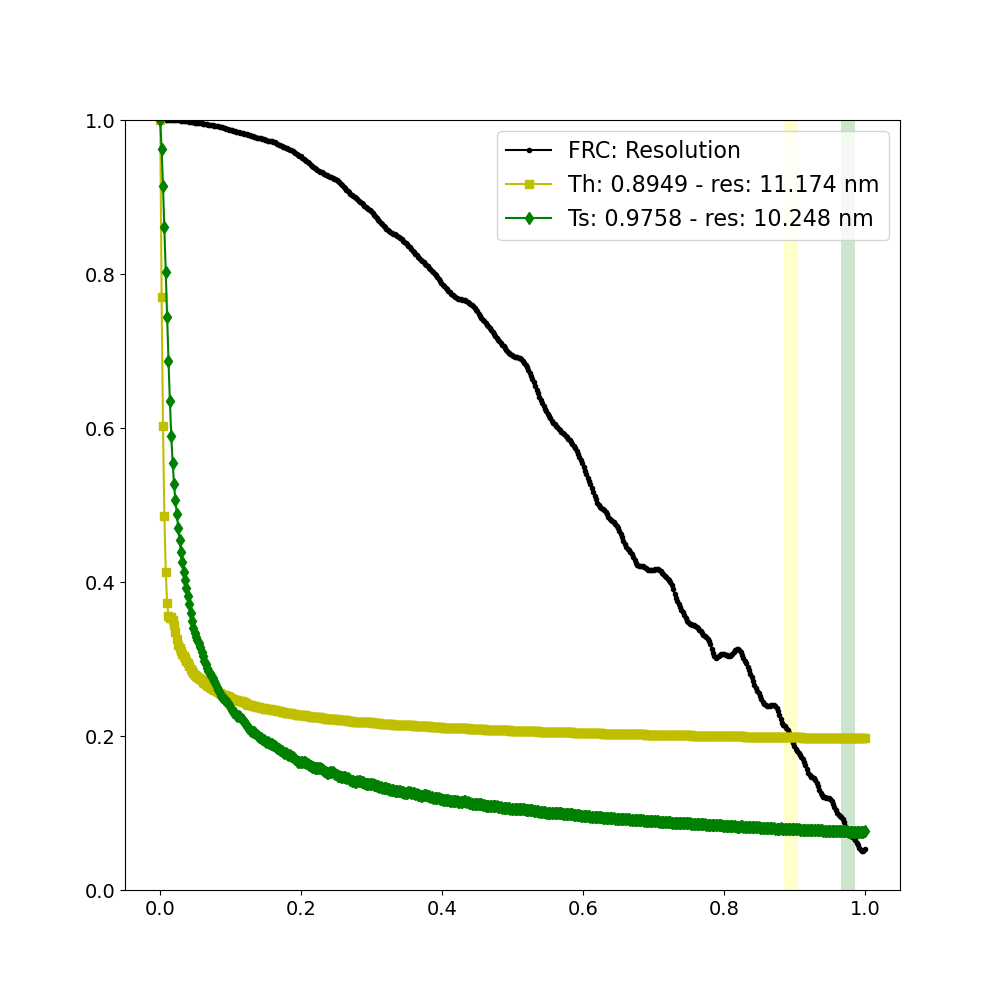

In [10]:
dic = frc.computep( wimg , cpus ) 
frc.plot(dic, {'label': "Resolution", 'unit': "nm", 'pxlsize': pixel_size} )

# FSC

- __path:__ absolute path to a .npy volume file, for instance: /ibira/lnls/beamlines/caterete/proposals/00000000/proc/recons/sample01/sample01.npy

In [ ]:
path = ""
volume = np.load(path)

- __frame:__ select integer to preview a certain slice/frame of the 3D volume

In [ ]:
frame = 0 

wvolume = fsc.window( volume, padding, [sharpness, radius] )

fig, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(img[frame,:,:]), ax[0].set_title('Original')
ax[1].imshow(wimg[frame,:,:]), ax[1].set_title('Filtered') 
plt.show()

## FSC Calculation

In [ ]:
dic = fsc.computep( wvolume , cpus ) 
fsc.plot(dic, {'label': "Resolution", 'unit': "nm", 'pxlsize': pixel_size, 'figsize': (5,5) } )